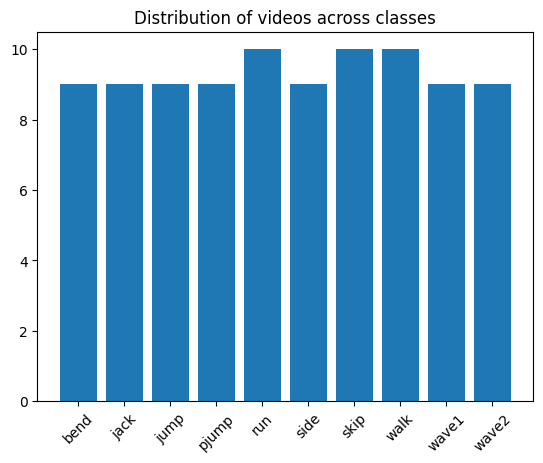

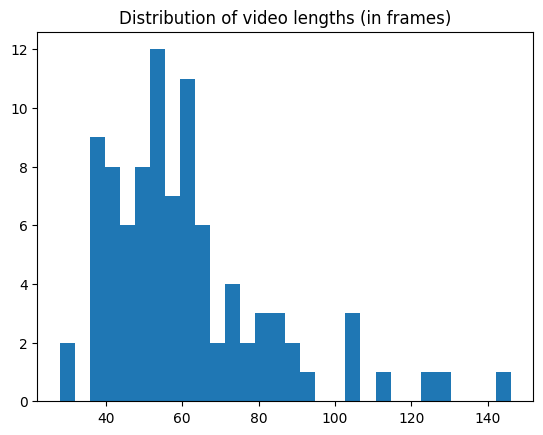

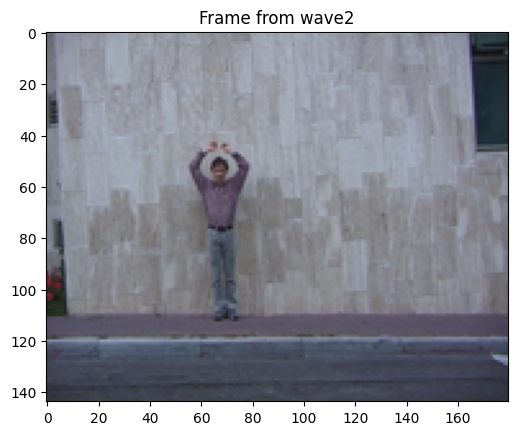

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import random

base_path = '/content/drive/MyDrive/CMPE_255_DataPrep/Task6/Video'

# 1. Distribution of videos across classes
folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
video_counts = {folder: len(os.listdir(os.path.join(base_path, folder))) for folder in folders}
plt.bar(video_counts.keys(), video_counts.values())
plt.xticks(rotation=45)
plt.title('Distribution of videos across classes')
plt.show()

# 2. Check the length distribution of videos
video_lengths = []
for folder in folders:
    for video_file in os.listdir(os.path.join(base_path, folder)):
        cap = cv2.VideoCapture(os.path.join(base_path, folder, video_file))
        video_lengths.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
        cap.release()

plt.hist(video_lengths, bins=30)
plt.title('Distribution of video lengths (in frames)')
plt.show()

# 3. Visualize few frames from random videos
sample_folder = random.choice(folders)
sample_video = random.choice(os.listdir(os.path.join(base_path, sample_folder)))
cap = cv2.VideoCapture(os.path.join(base_path, sample_folder, sample_video))
ret, frame = cap.read()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title(f'Frame from {sample_folder}')
plt.show()
cap.release()


In [3]:
import os
import cv2

base_path = '/content/drive/MyDrive/CMPE_255_DataPrep/Task6/Video'  # Adjust this path based on your mounting point

# 1. Check for corrupted video files
corrupted_files = []
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    for video_file in os.listdir(folder_path):
        video_path = os.path.join(folder_path, video_file)
        cap = cv2.VideoCapture(video_path)
        ret, frame = cap.read()
        if not ret:
            corrupted_files.append(video_path)
        cap.release()

# Print or remove corrupted files
for corrupted in corrupted_files:
    print(f"Corrupted file: {corrupted}")
    # Uncomment the line below if you want to delete the corrupted files
    os.remove(corrupted)

# 2. Decide on a consistent video length and trim or pad videos
TARGET_LENGTH = 100  # This is an arbitrary choice, adjust based on your EDA findings
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    for video_file in os.listdir(folder_path):
        video_path = os.path.join(folder_path, video_file)
        cap = cv2.VideoCapture(video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # If video is longer than target, trim it
        if frame_count > TARGET_LENGTH:
            # Implement video trimming logic here
            pass
        # If video is shorter than target, pad it
        elif frame_count < TARGET_LENGTH:
            # Implement video padding logic here
            pass

        cap.release()


In [5]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=417edc640b81d14c16eea1df6fca677fc829908fa99c7e12682353509df551c7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unin

In [7]:
import os
import cv2
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileReport  # Uncomment if you have this library installed

base_path = '/content/drive/MyDrive/CMPE_255_DataPrep/Task6/Video'  # Adjust this path based on your mounting point

# 1. Feature extraction from videos
def extract_video_features(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    avg_rgb = np.zeros(3)

    for _ in range(frame_count):
        ret, frame = cap.read()
        if ret:
            avg_rgb += np.mean(frame, axis=(0,1))

    avg_rgb /= frame_count
    cap.release()
    return frame_count, avg_rgb[0], avg_rgb[1], avg_rgb[2]

data = []
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    for video_file in os.listdir(folder_path):
        video_path = os.path.join(folder_path, video_file)
        frame_count, avg_r, avg_g, avg_b = extract_video_features(video_path)
        data.append([video_path, frame_count, avg_r, avg_g, avg_b])

df = pd.DataFrame(data, columns=['Video_Path', 'Frame_Count', 'Avg_R', 'Avg_G', 'Avg_B'])

# 2. AutoEDA on extracted features
#profile = ProfileReport(df, title="Video Data Report")
#profile.to_file("video_data_report.html")


In [8]:
pip install sweetviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 28.6 MB/s eta 0:00:00


In [9]:
import sweetviz as sv

# Assuming df is the DataFrame created from the previous steps
report = sv.analyze(df)
report.show_html("video_data_sweetviz_report.html")


                                             |          | [  0%]   00:00 -> (? left)

Report video_data_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
!cp video_data_sweetviz_report.html /content/drive/MyDrive/CMPE_255_DataPrep/Task6/Video


In [14]:
def extract_label_from_filename(filename):
    # Assuming filenames are in the format: name_action.avi
    return filename.split('_')[-1].split('.')[0]

# Assuming the column 'Video_Path' contains the full path of the video files
df['label'] = df['Video_Path'].apply(lambda x: extract_label_from_filename(os.path.basename(x)))


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% validation, 15% test


In [17]:
# Drop non-numeric columns before scaling
X_train_numeric = X_train.drop(columns=['Video_Path'])
X_val_numeric = X_val.drop(columns=['Video_Path'])
X_test_numeric = X_test.drop(columns=['Video_Path'])

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Use the fitted scaler to transform validation and test data
X_val_scaled = scaler.transform(X_val_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


In [18]:
!pip install tpot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=f369032f9ce5fd92bdb0cfb2b9e58d44cf74402a0d3831e00fbf2647531293db
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [19]:
from tpot import TPOTClassifier

# Initialize TPOT
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

# Fit TPOT on the training data
tpot.fit(X_train_scaled, y_train)

# Evaluate the best pipeline on the validation data
val_score = tpot.score(X_val_scaled, y_val)
print(f"Validation Accuracy: {val_score:.4f}")


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.24615384615384617

Generation 2 - Current best internal CV score: 0.24615384615384617

Generation 3 - Current best internal CV score: 0.24615384615384617

Generation 4 - Current best internal CV score: 0.24615384615384617

Generation 5 - Current best internal CV score: 0.24615384615384617

Best pipeline: BernoulliNB(input_matrix, alpha=10.0, fit_prior=False)


ValueError: ignored